In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os 
import csv
from math import log2


sys.path.insert(0, '..')
os.chdir('..')
print(os.getcwd())

%load_ext autoreload
%autoreload 2

/Users/pranayjain/Desktop/Security Research/constrained-padding-sequences


In [7]:
from pwod import run_pwod
from pfs import run_pfs
from mvmd import run_mvmd
from bdk import run_bdk

from utils import compute_c_vals
from load_dataset import load_dataset

In [12]:
def set_marker(pt):
    if 'ourAlg' in pt:
        return 'D'
    if 'noDistAlg' in pt or 'pwod' in pt:
        return  'x'
    if 'bdkAlg' in pt:
        return 'o'
    return '+'

### Autocomplete Dataset

In [37]:
dataset = 'autocomplete'
l = 3

vertices, _, _,_,_,_,_ = load_dataset(dataset, False, 4)

In [40]:
max_pad_overheads, mean_pad_overheads = {}, {}

for c in [1.05, 1.25, 1.5, 2.0]:
    pad_scheme_pfs = run_pfs(dataset, c)['pad_scheme']
    pad_scheme_pwod, _ = run_pwod(dataset, c)

    pad_scheme_flat_pwod = {k: v[0][0] for k, v in pad_scheme_pwod.items() }
    pad_scheme_flat_pfs = {k: v[0][0] for k, v in pad_scheme_pfs.items() }

    del pad_scheme_flat_pfs['root']
    del pad_scheme_flat_pwod['root']

    max_pad_overhead, mean_pad_overhead = compute_c_vals(pad_scheme_flat_pfs, vertices)
    max_pad_overheads[f'\\ourAlg (\\padFactor={c})'] = max_pad_overhead
    mean_pad_overheads[f'\\ourAlg (\\padFactor={c})'] = mean_pad_overhead

    max_pad_overhead, mean_pad_overhead = compute_c_vals(pad_scheme_flat_pfs, vertices)
    max_pad_overheads[f'\\noDistAlg (\\padFactor={c})'] = max_pad_overhead
    mean_pad_overheads[f'\\noDistAlg (\\padFactor={c})'] = mean_pad_overhead

pad_scheme_bdk = run_bdk(dataset, num_trials=1000)['pad_scheme']
pad_scheme_flat_bdk = {k: v[0][0] for k,v in pad_scheme_bdk.items()}
del pad_scheme_flat_bdk['root']

max_pad_overhead, mean_pad_overhead = compute_c_vals(pad_scheme_flat_bdk, vertices)
max_pad_overheads['\\bdkAlg'] = max_pad_overhead
mean_pad_overheads['\\bdkAlg'] = mean_pad_overhead

pad_factors_mvmd = run_mvmd(dataset, l)['pad_factors']
max_pad_overhead, mean_pad_overhead = pad_factors_mvmd

max_pad_overheads['\\lDivAlg{3}'] = max_pad_overhead
mean_pad_overheads['\\lDivAlg{3}'] = mean_pad_overhead

Gurobi's optimization method runtime (in seconds): 3.813265085220337
Gurobi's optimization method runtime (in seconds): 25.18366503715515
Gurobi's optimization method runtime (in seconds): 25.349435091018677
Gurobi's optimization method runtime (in seconds): 33.341598987579346
Completed BDK Run 0
Completed BDK Run 1
Completed BDK Run 2
Completed BDK Run 3
Completed BDK Run 4
Completed BDK Run 5
Completed BDK Run 6
Completed BDK Run 7
Completed BDK Run 8
Completed BDK Run 9
Completed BDK Run 10
Completed BDK Run 11
Completed BDK Run 12
Completed BDK Run 13
Completed BDK Run 14
Completed BDK Run 15
Completed BDK Run 16
Completed BDK Run 17
Completed BDK Run 18
Completed BDK Run 19
Completed BDK Run 20
Completed BDK Run 21
Completed BDK Run 22
Completed BDK Run 23
Completed BDK Run 24
Completed BDK Run 25
Completed BDK Run 26
Completed BDK Run 27
Completed BDK Run 28
Completed BDK Run 29
Completed BDK Run 30
Completed BDK Run 31
Completed BDK Run 32
Completed BDK Run 33
Completed BDK Run 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


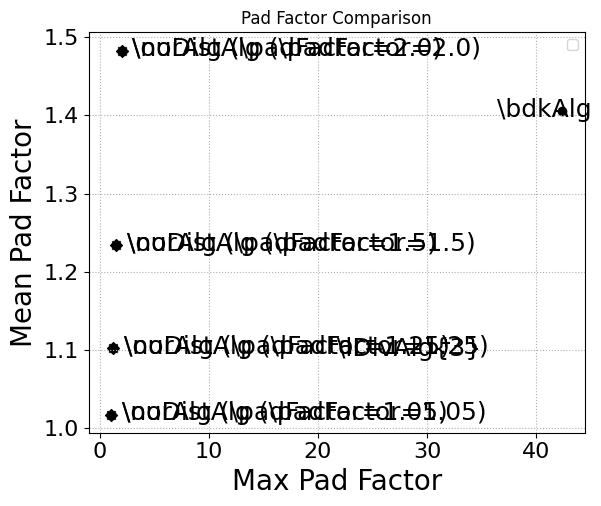

In [43]:
# ----------- For Autocomplete Only

f, ax = plt.subplots(figsize=(6.4, 5.2))
max_overheads, mean_overheads = list(max_pad_overheads.values()), list(mean_pad_overheads.values())
for i in range(len(max_pad_overheads)):
    ax.scatter(max_overheads[i], mean_overheads[i], color='black', marker=set_marker(list(max_pad_overheads.keys())[i]))

for method in max_pad_overheads.keys():
    x_pt = max_pad_overheads[method]
    y_pt = mean_pad_overheads[method]
    label = method
    if 'bdkAlg' in method:
        x_pt -= 7
        # label = 'Backes, et al.'
    if 'lDivAlg' in method:
        x_pt -= 11
        if '3' in method:
            y_pt -= 0.01
    if 'noDistAlg' in method and 'padFactor}=1.25)' in method:
        y_pt += 0.01
    ax.annotate(label, ( x_pt + 1, y_pt - 0.007 ), fontsize=18)

# plt.xlabel('\\res{\\padFactor}', fontsize=20)
plt.xlabel('Max Pad Factor', fontsize=20)
# plt.ylabel('\\avg{\\res{\\padFactor}}', fontsize=20)
plt.ylabel('Mean Pad Factor', fontsize=20)
ax.tick_params(axis='both', labelsize=16)
plt.grid(linestyle='dotted')
plt.legend()
plt.title("Pad Factor Comparison")
plt.show()

### Wikipedia Dataset

In [31]:
dataset = 'wikipedia'
l = 3

vertices, _, _,_,_,_,_ = load_dataset(dataset, False, 4)

In [32]:
max_pad_overheads, mean_pad_overheads = {}, {}

for c in [1.05, 1.25, 1.5, 2.0]:
    pad_scheme_pfs = run_pfs(dataset, c)['pad_scheme']
    pad_scheme_pwod, _ = run_pwod(dataset, c)

    pad_scheme_flat_pwod = {k: v[0][0] for k, v in pad_scheme_pwod.items() }
    pad_scheme_flat_pfs = {k: v[0][0] for k, v in pad_scheme_pfs.items() }

    max_pad_overhead, mean_pad_overhead = compute_c_vals(pad_scheme_flat_pfs, vertices)
    max_pad_overheads[f'\\ourAlg (\\padFactor={c})'] = max_pad_overhead
    mean_pad_overheads[f'\\ourAlg (\\padFactor={c})'] = mean_pad_overhead

    max_pad_overhead, mean_pad_overhead = compute_c_vals(pad_scheme_flat_pfs, vertices)
    max_pad_overheads[f'\\noDistAlg (\\padFactor={c})'] = max_pad_overhead
    mean_pad_overheads[f'\\noDistAlg (\\padFactor={c})'] = mean_pad_overhead

pad_scheme_bdk = run_bdk(dataset, num_trials=1000)['pad_scheme']
pad_scheme_flat_bdk = {k: v[0][0] for k,v in pad_scheme_bdk.items()}

max_pad_overhead, mean_pad_overhead = compute_c_vals(pad_scheme_flat_bdk, vertices)
max_pad_overheads['\\bdkAlg'] = max_pad_overhead
mean_pad_overheads['\\bdkAlg'] = mean_pad_overhead

pad_factors_mvmd = run_mvmd(dataset, l)['pad_factors']
max_pad_overhead, mean_pad_overhead = pad_factors_mvmd

max_pad_overheads['\\lDivAlg{3}'] = max_pad_overhead
mean_pad_overheads['\\lDivAlg{3}'] = mean_pad_overhead

Gurobi's optimization method runtime (in seconds): 5.703882932662964
i_inf for target sequence length 1 = 6.169925001442312
i_inf for target sequence length 2 = 10.76487159073609
i_inf for target sequence length 3 = 11.509775004326936
i_inf for target sequence length 4 = 11.634811050171718
i_inf for target sequence length 5 = 11.669770888525518
i_inf for target sequence length 6 = 11.681677655209691
i_inf for target sequence length 7 = 11.689561254285525
Gurobi's optimization method runtime (in seconds): 15.437246084213257
i_inf for target sequence length 1 = 4.087462841250339
i_inf for target sequence length 2 = 7.78135971352466
i_inf for target sequence length 3 = 10.454299293619899
i_inf for target sequence length 4 = 11.281350514981035
i_inf for target sequence length 5 = 11.434106928609955
i_inf for target sequence length 6 = 11.465056167831175
i_inf for target sequence length 7 = 11.479780264029099
Gurobi's optimization method runtime (in seconds): 19.395704984664917
i_inf for ta

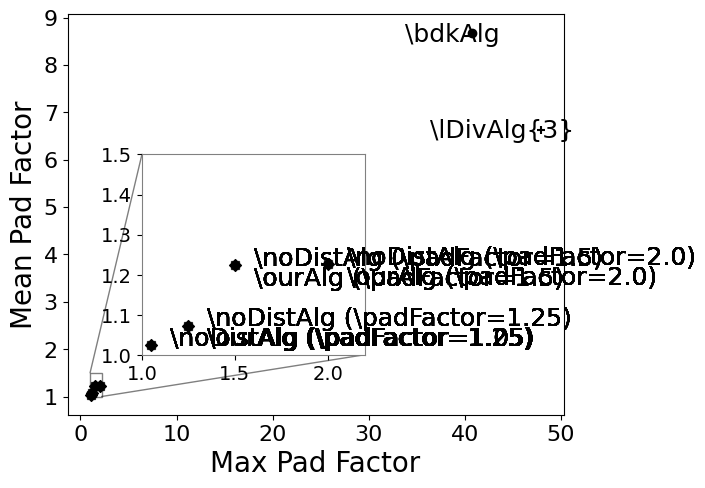

In [34]:
# --------- For WIKIPEDIA Only

f, ax = plt.subplots(figsize=(6.4, 5.2))

# for method, precision_recall_map in mp.items():
# ax.scatter(list(max_pad_overheads.values()), list(mean_pad_overheads.values()), color='dimgrey', marker=)
max_overheads, mean_overheads = list(max_pad_overheads.values()), list(mean_pad_overheads.values())
for i in range(len(max_pad_overheads)):
    ax.scatter(max_overheads[i], mean_overheads[i], color='black', marker=set_marker(list(max_pad_overheads.keys())[i]))

ax_ins = ax.inset_axes(
    [0.15, 0.15, 0.45, 0.5],
    xlim=(1,2.2), ylim=(1,1.5)
)

ax_ins.spines['bottom'].set_color('grey')
ax_ins.spines['top'].set_color('grey') 
ax_ins.spines['right'].set_color('grey')
ax_ins.spines['left'].set_color('grey')


for i in range(len(max_pad_overheads)):
    method = list(max_pad_overheads.keys())[i]
    if 'ourAlg' in method or 'noDistAlg' in method or 'pwod' in method:
        ax_ins.scatter(max_overheads[i], mean_overheads[i], color='black', marker=set_marker(list(max_pad_overheads.keys())[i]))
    for method in max_pad_overheads.keys():
        if 'ourAlg' in method or 'noDistAlg' in method:
            x_pt = max_pad_overheads[method] + 0.1
            y_pt = mean_pad_overheads[method]
            label = method

            if 'ourAlg' in method:
                y_pt -= 0.05
            if 'padFactor}=1.25' in method:
                y_pt -= 0.02
            if 'padFactor}=1.5' in method:
                if 'noDistAlg' in method:
                    y_pt += 0.01
                if 'ourAlg' in method:
                    y_pt += 0.02
            if 'padFactor}=2' in method:
                x_pt -= 0.95
                if 'ourAlg' in method:
                    x_pt += 0.1
                    y_pt -= 0.02
            ax_ins.annotate(label, ( x_pt, y_pt ), fontsize=18)

ax.indicate_inset_zoom(ax_ins, edgecolor='black')
ax_ins.tick_params(axis='both', labelsize=14)

for method in max_pad_overheads.keys():
    if 'ourAlg' in method or 'noDistAlg' in method: continue
    x_pt = max_pad_overheads[method]
    y_pt = mean_pad_overheads[method]
    label = method
    if 'bdkAlg' in method:
        x_pt -= 7.5
        y_pt -= 0.2
    if 'lDivAlg' in method:
        x_pt -= 12
        y_pt -= 0.05
    if 'lDivAlg{3}' in method:
        y_pt -= 0.1
    if 'lDivAlg{4}' in method:
        y_pt -= 0.1
    ax.annotate(label, ( x_pt + 0.5, y_pt ), fontsize=18)

ax.tick_params(axis='both', labelsize=16)
plt.xlabel('Max Pad Factor', fontsize=20)
plt.ylabel('Mean Pad Factor', fontsize=20)

plt.show()

### Linode from index Dataset

In [24]:
dataset = 'linode_from_index'
l = 3

vertices, vertices_subset, sequences, prefix_closed_sequences, max_length, edges, Q = load_dataset(dataset, False, 4)

Completed BDK Run 0
Completed BDK Run 1
Completed BDK Run 2
Completed BDK Run 3
Completed BDK Run 4
Completed BDK Run 5
Completed BDK Run 6
Completed BDK Run 7
Completed BDK Run 8
Completed BDK Run 9
Completed 10 runs of BDK.
1
2
3
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
Can't achieve l-diversity. Returning full set.
4
cant satisfy l-diversity! http://192.168.80.128:3000/docs//web-servers/lamp/install-lamp-stack-on-ubuntu-18-04/ 1 1
cant satisfy l-diversity! http://192.168.80.128:3000/docs/troubleshooting/finnix-rescue-mode/ 1 1
cant satisfy l-diversity! http://192.168.80.128:3000/docs//web-servers/lamp/install-lamp-stack-on-ubuntu-18-04/ 1 1
cant satisfy l-diversity! http://192.168.80.128:3000/docs/security/ssl/ssl-certificates-with-nginx/ 1 2
can

In [26]:
max_pad_overheads, mean_pad_overheads = {}, {}

for c in [1.05, 1.25, 1.5, 2.0]:
    pad_scheme_pfs = run_pfs(dataset, c)['pad_scheme']
    pad_scheme_pwod, _ = run_pwod(dataset, c)

    pad_scheme_flat_pwod = {k: v[0][0] for k, v in pad_scheme_pwod.items() }
    pad_scheme_flat_pfs = {k: v[0][0] for k, v in pad_scheme_pfs.items() }

    max_pad_overhead, mean_pad_overhead = compute_c_vals(pad_scheme_flat_pfs, vertices)
    max_pad_overheads[f'\\ourAlg (\\padFactor={c})'] = max_pad_overhead
    mean_pad_overheads[f'\\ourAlg (\\padFactor={c})'] = mean_pad_overhead

    max_pad_overhead, mean_pad_overhead = compute_c_vals(pad_scheme_flat_pfs, vertices)
    max_pad_overheads[f'\\noDistAlg (\\padFactor={c})'] = max_pad_overhead
    mean_pad_overheads[f'\\noDistAlg (\\padFactor={c})'] = mean_pad_overhead

pad_scheme_bdk = run_bdk(dataset, num_trials=10)['pad_scheme']
pad_scheme_flat_bdk = {k: v[0][0] for k,v in pad_scheme_bdk.items()}

max_pad_overhead, mean_pad_overhead = compute_c_vals(pad_scheme_flat_bdk, vertices)
max_pad_overheads['\\bdkAlg'] = max_pad_overhead
mean_pad_overheads['\\bdkAlg'] = mean_pad_overhead

pad_factors_mvmd = run_mvmd(dataset, l)['pad_factors']
max_pad_overhead, mean_pad_overhead = pad_factors_mvmd

max_pad_overheads['\\lDivAlg{3}'] = max_pad_overhead
mean_pad_overheads['\\lDivAlg{3}'] = mean_pad_overhead

Gurobi's optimization method runtime (in seconds): 0.24273300170898438
i_inf for target sequence length 1 = 0.0
i_inf for target sequence length 2 = 3.0
i_inf for target sequence length 3 = 8.366322214245816
i_inf for target sequence length 4 = 8.974414589805527
i_inf for target sequence length 5 = 7.515699838284043
i_inf for target sequence length 6 = 5.754887502163468
i_inf for target sequence length 7 = 2.0
Gurobi's optimization method runtime (in seconds): 0.35730409622192383
i_inf for target sequence length 1 = 0.0
i_inf for target sequence length 2 = 2.0
i_inf for target sequence length 3 = 6.169925001442312
i_inf for target sequence length 4 = 8.238404739325079
i_inf for target sequence length 5 = 6.599912842187128
i_inf for target sequence length 6 = 5.459431618637297
i_inf for target sequence length 7 = 2.0
Gurobi's optimization method runtime (in seconds): 0.5984082221984863
i_inf for target sequence length 1 = 0.0
i_inf for target sequence length 2 = 1.584962500721156
i_inf 

KeyError: 'http://192.168.80.128:3000/docs/~http://192.168.80.128:3000/docs/getting-started/'

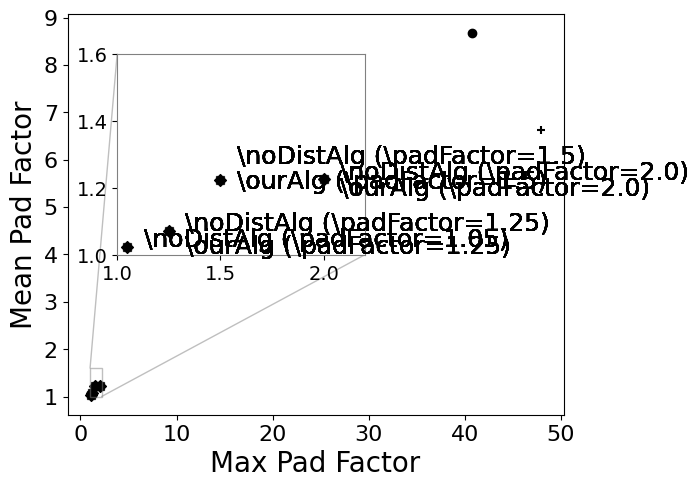

In [35]:
# ---------- FOR LINODE PLOT



f, ax = plt.subplots(figsize=(6.4, 5.2))

# for method, precision_recall_map in mp.items():
# ax.scatter(list(max_pad_overheads.values()), list(mean_pad_overheads.values()), color='dimgrey', marker=)
max_overheads, mean_overheads = list(max_pad_overheads.values()), list(mean_pad_overheads.values())
for i in range(len(max_pad_overheads)):
    ax.scatter(max_overheads[i], mean_overheads[i], color='black', marker=set_marker(list(max_pad_overheads.keys())[i]))

ax_ins = ax.inset_axes(
    [0.1, 0.4, 0.5, 0.5],
    xlim=(1,2.2), ylim=(1,1.6)
)

ax_ins.spines['bottom'].set_color('grey')
ax_ins.spines['top'].set_color('grey') 
ax_ins.spines['right'].set_color('grey')
ax_ins.spines['left'].set_color('grey')


for i in range(len(max_pad_overheads)):
    method = list(max_pad_overheads.keys())[i]
    if 'ourAlg' in method or 'noDistAlg' in method or 'pwod' in method:
        ax_ins.scatter(max_overheads[i], mean_overheads[i], color='black', marker=set_marker(list(max_pad_overheads.keys())[i]))
    
    
    for method in max_pad_overheads.keys():
        if 'ourAlg' in method or 'noDistAlg' in method:
            x_pt = max_pad_overheads[method]
            y_pt = mean_pad_overheads[method]
            label = method

            # if '=1.25' in method:
            x_pt -= 0.42
            if 'padFactor}=2' in method:
                x_pt -= 0.85

            if 'ourAlg' in method:
                y_pt -= 0.05
                if 'padFactor}=2' in method: 
                    y_pt += 0.04
                    x_pt += 0.1
            
            if 'noDistAlg' in method and 'padFactor}=2' in method:
                y_pt -= 0.05
            
            if '1.5' in method:
                y_pt += 0.025
                if 'noDistAlg' in method:
                    y_pt += 0.025

            if '1.25' in method and 'ourAlg' in method:
                y_pt -= 0.02
            ax_ins.annotate(label, ( x_pt + 0.5, y_pt ), fontsize=18)

ax.indicate_inset_zoom(ax_ins, edgecolor='grey')

ax_ins.tick_params(axis='both', labelsize=14)
# ax_ins.tick_params(axis='both', which='minor', labelsize=14)

for method in max_pad_overheads.keys():
    if 'ourAlg' in method or 'noDistAlg' in method: continue
    
    x_pt = max_pad_overheads[method]
    y_pt = mean_pad_overheads[method]
    label = method
    if 'bdkAlg' in method:
        x_pt -= 1500
        y_pt -= 1
    if 'lDivAlg' in method:    
        x_pt -= 2500
        y_pt -= 1
    # if 'lDivAlg{5}' in method:
    #     y_pt -= 1.75
    # if 'lDivAlg{3}' in method:
    #     y_pt -= 1.75
    ax.annotate(label, ( x_pt + 0.5, y_pt ), fontsize=18)

ax.set_yscale('linear')
# plt.xlabel('\\res{\\padFactor}', fontsize=20)
plt.xlabel('Max Pad Factor', fontsize=20)
# plt.ylabel('\\avg{\\res{\\padFactor}}', fontsize=20)
plt.ylabel('Mean Pad Factor', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()